<a href="https://colab.research.google.com/github/Allen123321/DEMO-DL/blob/master/HMM_%E8%82%A1%E7%A5%A8%E9%A2%84%E6%B5%8B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install hmmlearn

     |████████████████████████████████| 368kB 2.8MB/s 


In [4]:

import numpy as np
from hmmlearn import hmm
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.metrics.pairwise import pairwise_distances_argmin
import warnings

In [5]:
def expand(a, b):
    d = (b - a) * 0.05
    return a-d, b+d

In [6]:
warnings.filterwarnings("ignore")   # hmmlearn(0.2.0) < sklearn(0.18)

In [14]:
# 加载数据
# 0日期  1开盘  2最高  3最低  4收盘  5成交量  6成交额
# delimiter: 指定分隔符
# skiprows：给定前面多少行数据不进行处理
# usecols: 给定第4 5 6 2 3这五列数据进行读入(下标从0开始)
x = np.loadtxt('SH600000.txt', delimiter='\t', skiprows=2, usecols=(4, 5, 6, 2, 3),encoding='gbk')
close_price = x[:, 0] # 收盘价
volumn = x[:, 1] # 成交量
amount = x[:, 2] # 成交额
amplitude_price = x[:, 3] - x[:, 4] # 每天的最高价与最低价的差
diff_price = np.diff(close_price)   # 涨跌值(每天相对于昨天的涨跌幅)
volumn = volumn[1:]                 # 成交量(今天的成交量)
amount = amount[1:]                 # 成交额(今天的成交额度)
amplitude_price = amplitude_price[1:]   # 每日振幅(今天的振幅)
sample = np.column_stack((diff_price, volumn, amount, amplitude_price))    # 观测值
print("样本量:%d， 特征数目:%d" % sample.shape)
sample

样本量:1510， 特征数目:4


array([[ 9.00000000e-02,  1.15147943e+08,  2.43689088e+09,
         4.70000000e-01],
       [-2.40000000e-01,  9.67825750e+07,  2.03417408e+09,
         2.40000000e-01],
       [-2.80000000e-01,  8.52360720e+07,  1.76180096e+09,
         4.40000000e-01],
       ...,
       [ 3.40000000e-01,  3.56315260e+07,  6.50177344e+08,
         4.80000000e-01],
       [-1.00000000e-01,  1.83124240e+07,  3.33790688e+08,
         2.20000000e-01],
       [-1.70000000e-01,  1.77865250e+07,  3.21768768e+08,
         3.70000000e-01]])

In [15]:
# 模型构建
## 给定隐特征的数目
n = 5
model = hmm.GaussianHMM(n_components=n, covariance_type='full')
model.fit(sample)
y = model.predict_proba(sample) # 获取预测的概率
print(y)
print(model.predict(sample)) # 获取预测状态值


[[0.00000000e+00 1.52749201e-08 9.99999985e-01 1.58356115e-36
  9.23914059e-30]
 [3.58310343e-88 2.32524251e-03 9.97365960e-01 1.61437918e-04
  1.47359341e-04]
 [1.38523067e-64 8.93312845e-04 9.89876465e-01 9.20087920e-03
  2.93429140e-05]
 ...
 [2.29677449e-16 3.61942562e-08 1.33036108e-02 9.86696353e-01
  3.68711733e-10]
 [6.61131570e-04 6.79274845e-07 7.04717556e-04 9.98633469e-01
  2.99599431e-09]
 [8.44340618e-06 6.38419216e-05 6.71036550e-03 9.93216877e-01
  4.71797146e-07]]
[2 2 2 ... 3 3 3]


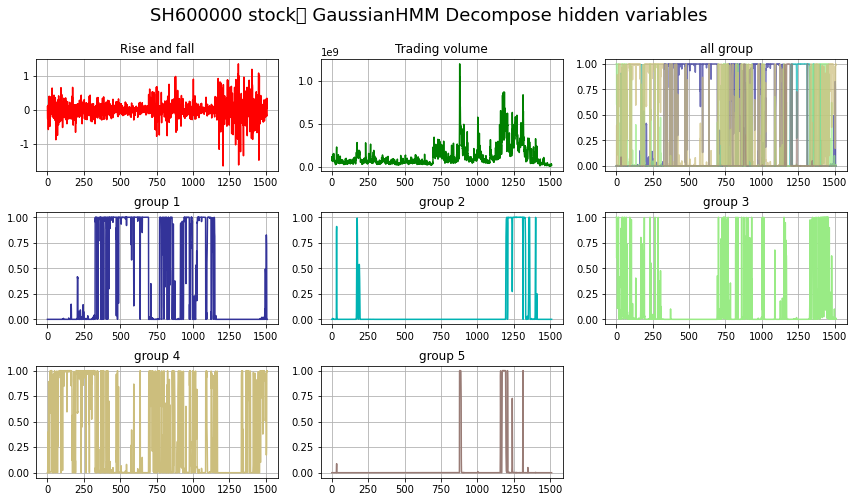

In [19]:
# 画图
t = np.arange(len(diff_price))
mpl.rcParams['font.sans-serif'] = [u'SimHei']
mpl.rcParams['axes.unicode_minus'] = False
plt.figure(figsize=(12,9), facecolor='w')
plt.subplot(431)
plt.plot(t, diff_price, 'r-')
plt.grid(True)
plt.title(u'Rise and fall')
plt.subplot(432)
plt.plot(t, volumn, 'g-')
plt.grid(True)
plt.title(u'Trading volume')

# 产生一个颜色
clrs = plt.cm.terrain(np.linspace(0, 0.8, n))
plt.subplot(433)
for i, clr in enumerate(clrs):
    # 画到一张图中
    plt.plot(t, y[:, i], '-', color=clr, alpha=0.7)
plt.title(u'all group')
plt.grid(True)

# 分开画
for i, clr in enumerate(clrs):
    plt.subplot(4, 3, i+4)
    plt.plot(t, y[:, i], '-', color=clr)
    plt.title(u'group %d' % (i+1))
    plt.grid(True)
plt.suptitle(u'SH600000 stock： GaussianHMM Decompose hidden variables', fontsize=18)
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()